# Histogramas y Gráficos de dispersión en Python

## Cargando librerías y dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=sns.load_dataset("mpg")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## El método plot() de pandas

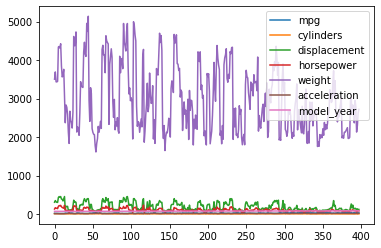

In [0]:
data.plot()
plt.show()

## Seleccionando el tipo de gráfica de a cuerdo al tipo de variable

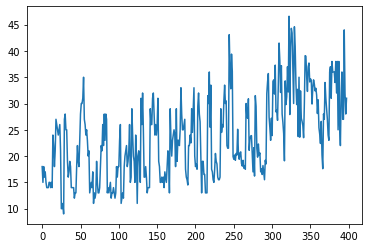

In [0]:
data["mpg"].plot()
plt.show()

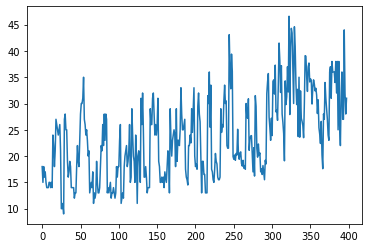

In [0]:
data.mpg.plot()
plt.show()

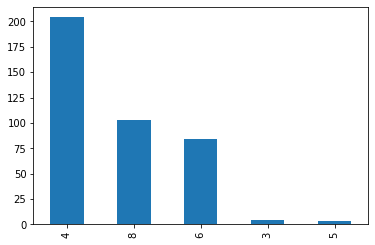

In [0]:
data.cylinders.value_counts().plot(kind="bar")
plt.show()

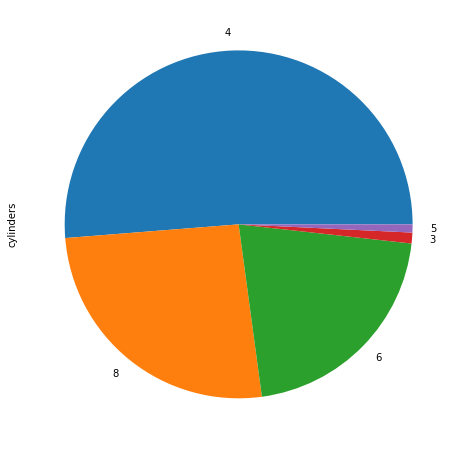

In [0]:
data.cylinders.value_counts().plot(kind="pie", figsize=(8,8))
plt.show()

## Creando subplots en pandas

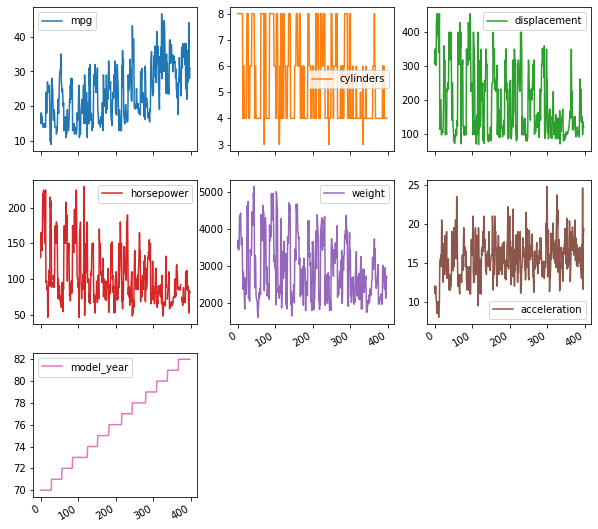

In [0]:
data.plot(subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

## Usando seaborn




*   distplot
*   violinplot
*   barplot
*   scatterplot
*   joinplot
*   pairplot
*   heatmap


In [0]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

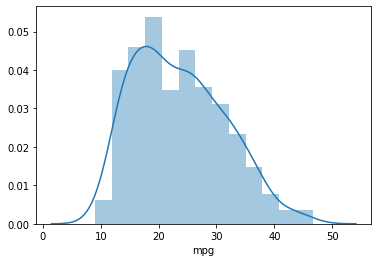

In [0]:
sns.distplot(data.mpg)
plt.show()

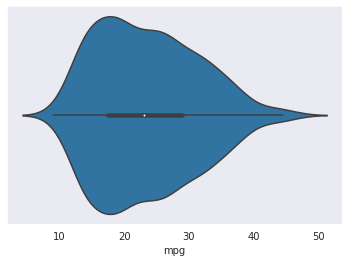

In [0]:
sns.violinplot(data.mpg)
plt.show()

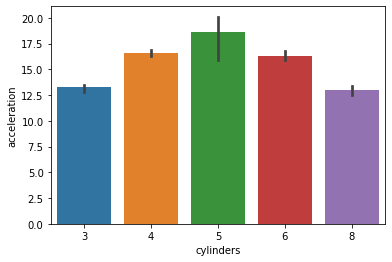

In [0]:
sns.barplot(x="cylinders", y="acceleration", data=data)
plt.show()

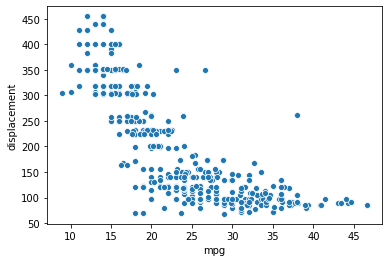

In [0]:
sns.scatterplot(x="mpg", y="displacement", data=data)
plt.show()

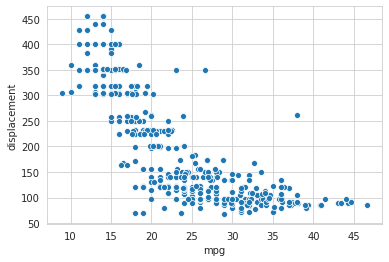

In [0]:
# https://python-graph-gallery.com/104-seaborn-themes/
sns.set_style("whitegrid")
sns.scatterplot(x="mpg", y="displacement", data=data)
plt.show()

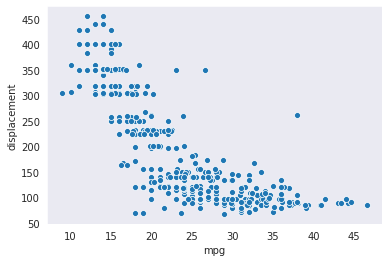

In [0]:
sns.set_style("dark")
sns.scatterplot(x="mpg", y="displacement", data=data)
plt.show()

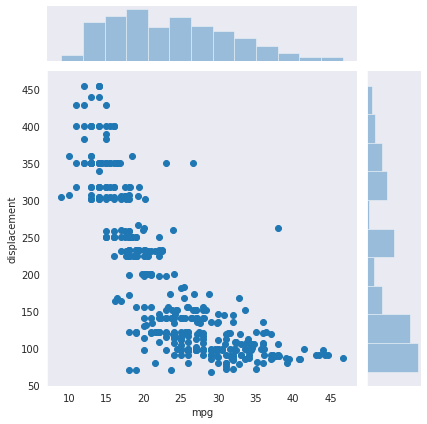

In [0]:
sns.jointplot(x="mpg", y="displacement", data=data, kind='scatter')
plt.show()

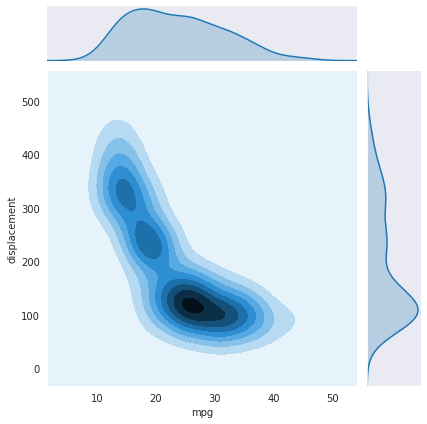

In [0]:
sns.jointplot(x="mpg", y="displacement", data=data, kind='kde')
plt.show()

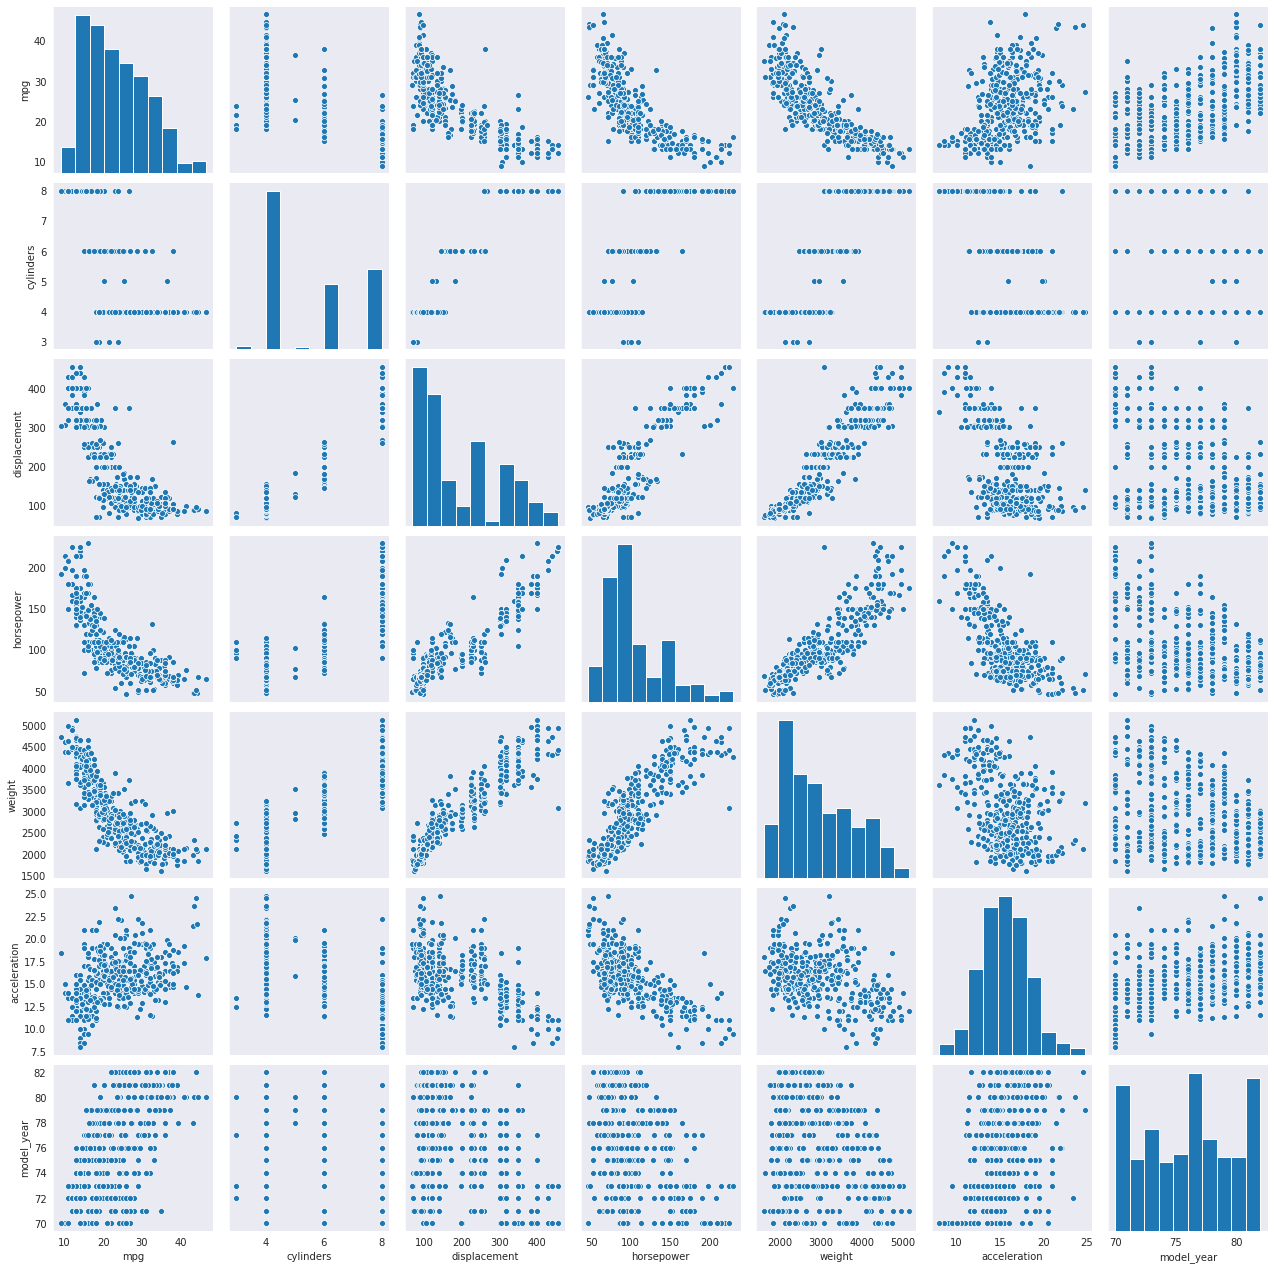

In [0]:
sns.pairplot(data)
plt.show()

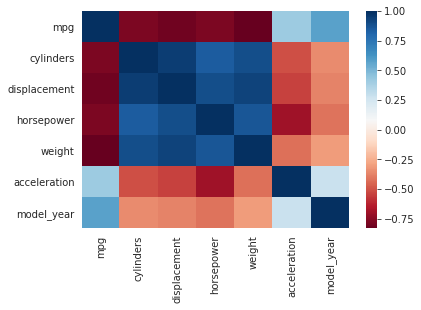

In [0]:
correlacion=data.corr()
sns.heatmap(correlacion, cmap="RdBu")
plt.show()

## Matplotlib.pyplot usando subplots()

<img src="img/axes.png" width=500>

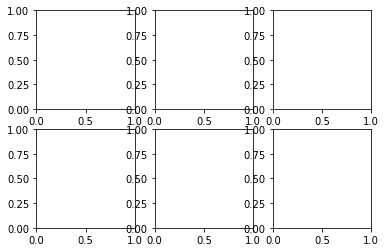

In [3]:
fig, ax = plt.subplots(2,3)

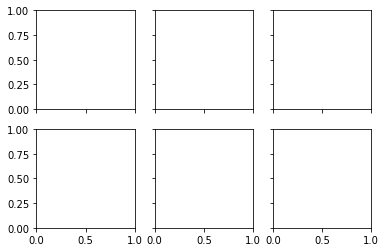

In [4]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


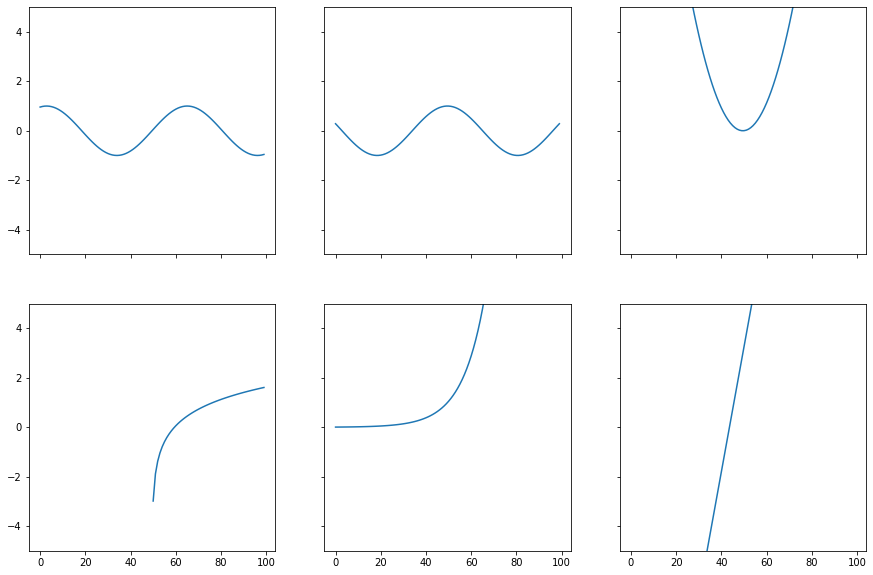

In [24]:
x=np.linspace(-5,5,100)

fig, ax = plt.subplots(2,3, sharex=True, sharey=True, figsize=(15,10))
ax[0,0].plot(np.sin(x))
ax[0,1].plot(np.cos(x))
ax[0,2].plot(x**2)
ax[1,0].plot(np.log(x))
ax[1,1].plot(np.exp(x))
ax[1,2].plot((5*x+3))
for i in range(2):
    for j in range(3):
        ax[i,j].set_ylim([-5,5])
plt.show()

## Graficando con datos de sitios web

In [105]:
import requests

url="https://es.wikipedia.org/wiki/Anexo:Medallero_de_los_Juegos_Olímpicos"
pagina=requests.get(url)
pagina

<Response [200]>

In [106]:
from bs4 import BeautifulSoup

html=pagina.content
soup=BeautifulSoup(html, "lxml")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Anexo:Medallero de los Juegos Olímpicos - Wikipedia, la enciclopedia libre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"eff9384e-e031-4fb1-85ad-b2f276df8100","wgCSPNonce":!1,"wgCanonicalNamespace":"Anexo","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":104,"wgPageName":"Anexo:Medallero_de_los_Juegos_Olímpicos","wgTitle":"Medallero de los Juegos Olímpicos","wgCurRevisionId":124377179,"wgRevisionId":124377179,"wgArticleId":168794,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Páginas con error

In [107]:
tables = soup.find_all('table')
len(tables)

1

In [110]:
tabla = pd.read_html(str(tables))[0]
tabla.head()

,País,N° Juegos Verano,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,N° Juegos Invierno,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,N° Juegos Total,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Afganistán (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,Alemania (GER)[1]​[2]​,16,191,192,323,615,11,78,78,53,209,27,269,270,285,824
2,Antillas Neerlandesas (AHO),13,0,1,0,1,2,0,0,0,0,15,0,1,0,1
3,Arabia Saudita (KSA),11,0,1,2,3,0,0,0,0,0,11,0,1,2,3
4,Argelia (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17


In [0]:
nuevas_columnas=['Country', 'Verano', 'Oro_v', 'Plata_v', 'Bronce_v', 'Total_v', 
               'Invierno', 'Oro_i', 'Plata_i', 'Bronce_i', 'Total_i',
               'Total', 'Oro_t', 'Plata_t', 'Bronce_t', 'Total_t',]
tabla.columns=nuevas_columnas

In [113]:
tabla.Country.iloc[0]

'Afganistán\xa0(AFG)'

In [114]:
tabla.Country=tabla.Country.apply(lambda x:x.split("\xa0")[0])
tabla

,Country,Verano,Oro_v,Plata_v,Bronce_v,Total_v,Invierno,Oro_i,Plata_i,Bronce_i,Total_i,Total,Oro_t,Plata_t,Bronce_t,Total_t
0,Afganistán,14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,Alemania,16,191,192,323,615,11,78,78,53,209,27,269,270,285,824
2,Antillas Neerlandesas,13,0,1,0,1,2,0,0,0,0,15,0,1,0,1
3,Arabia Saudita,11,0,1,2,3,0,0,0,0,0,11,0,1,2,3
4,Argelia,13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Participantes Olímpicos Independientes (IOP)[11]​,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
145,Serbia y Montenegro,1,0,2,0,2,1,0,0,0,0,2,0,2,0,2
146,Unión Soviética,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
147,Yugoslavia,18,28,31,31,90,16,0,3,1,4,34,28,34,32,94


In [0]:
tabla.iloc[142,0]="Equipo Unificado"
tabla.iloc[144,0]="Participantes Olímpicos Independientes"
tabla.iloc[148,0]="Equipo Mixto"

In [0]:
tabla.set_index("Country", inplace=True)

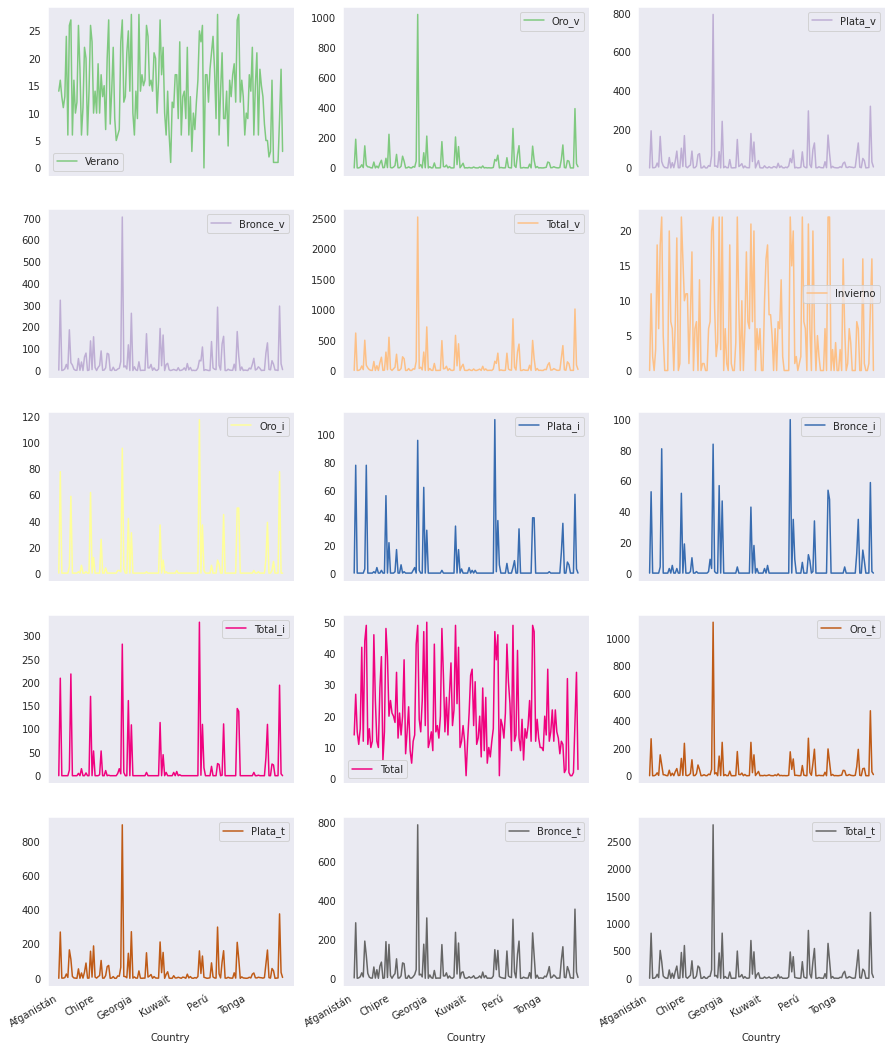

In [120]:
tabla.plot(subplots=True, figsize=(15,20), layout=(5,3), colormap="Accent")
plt.show()

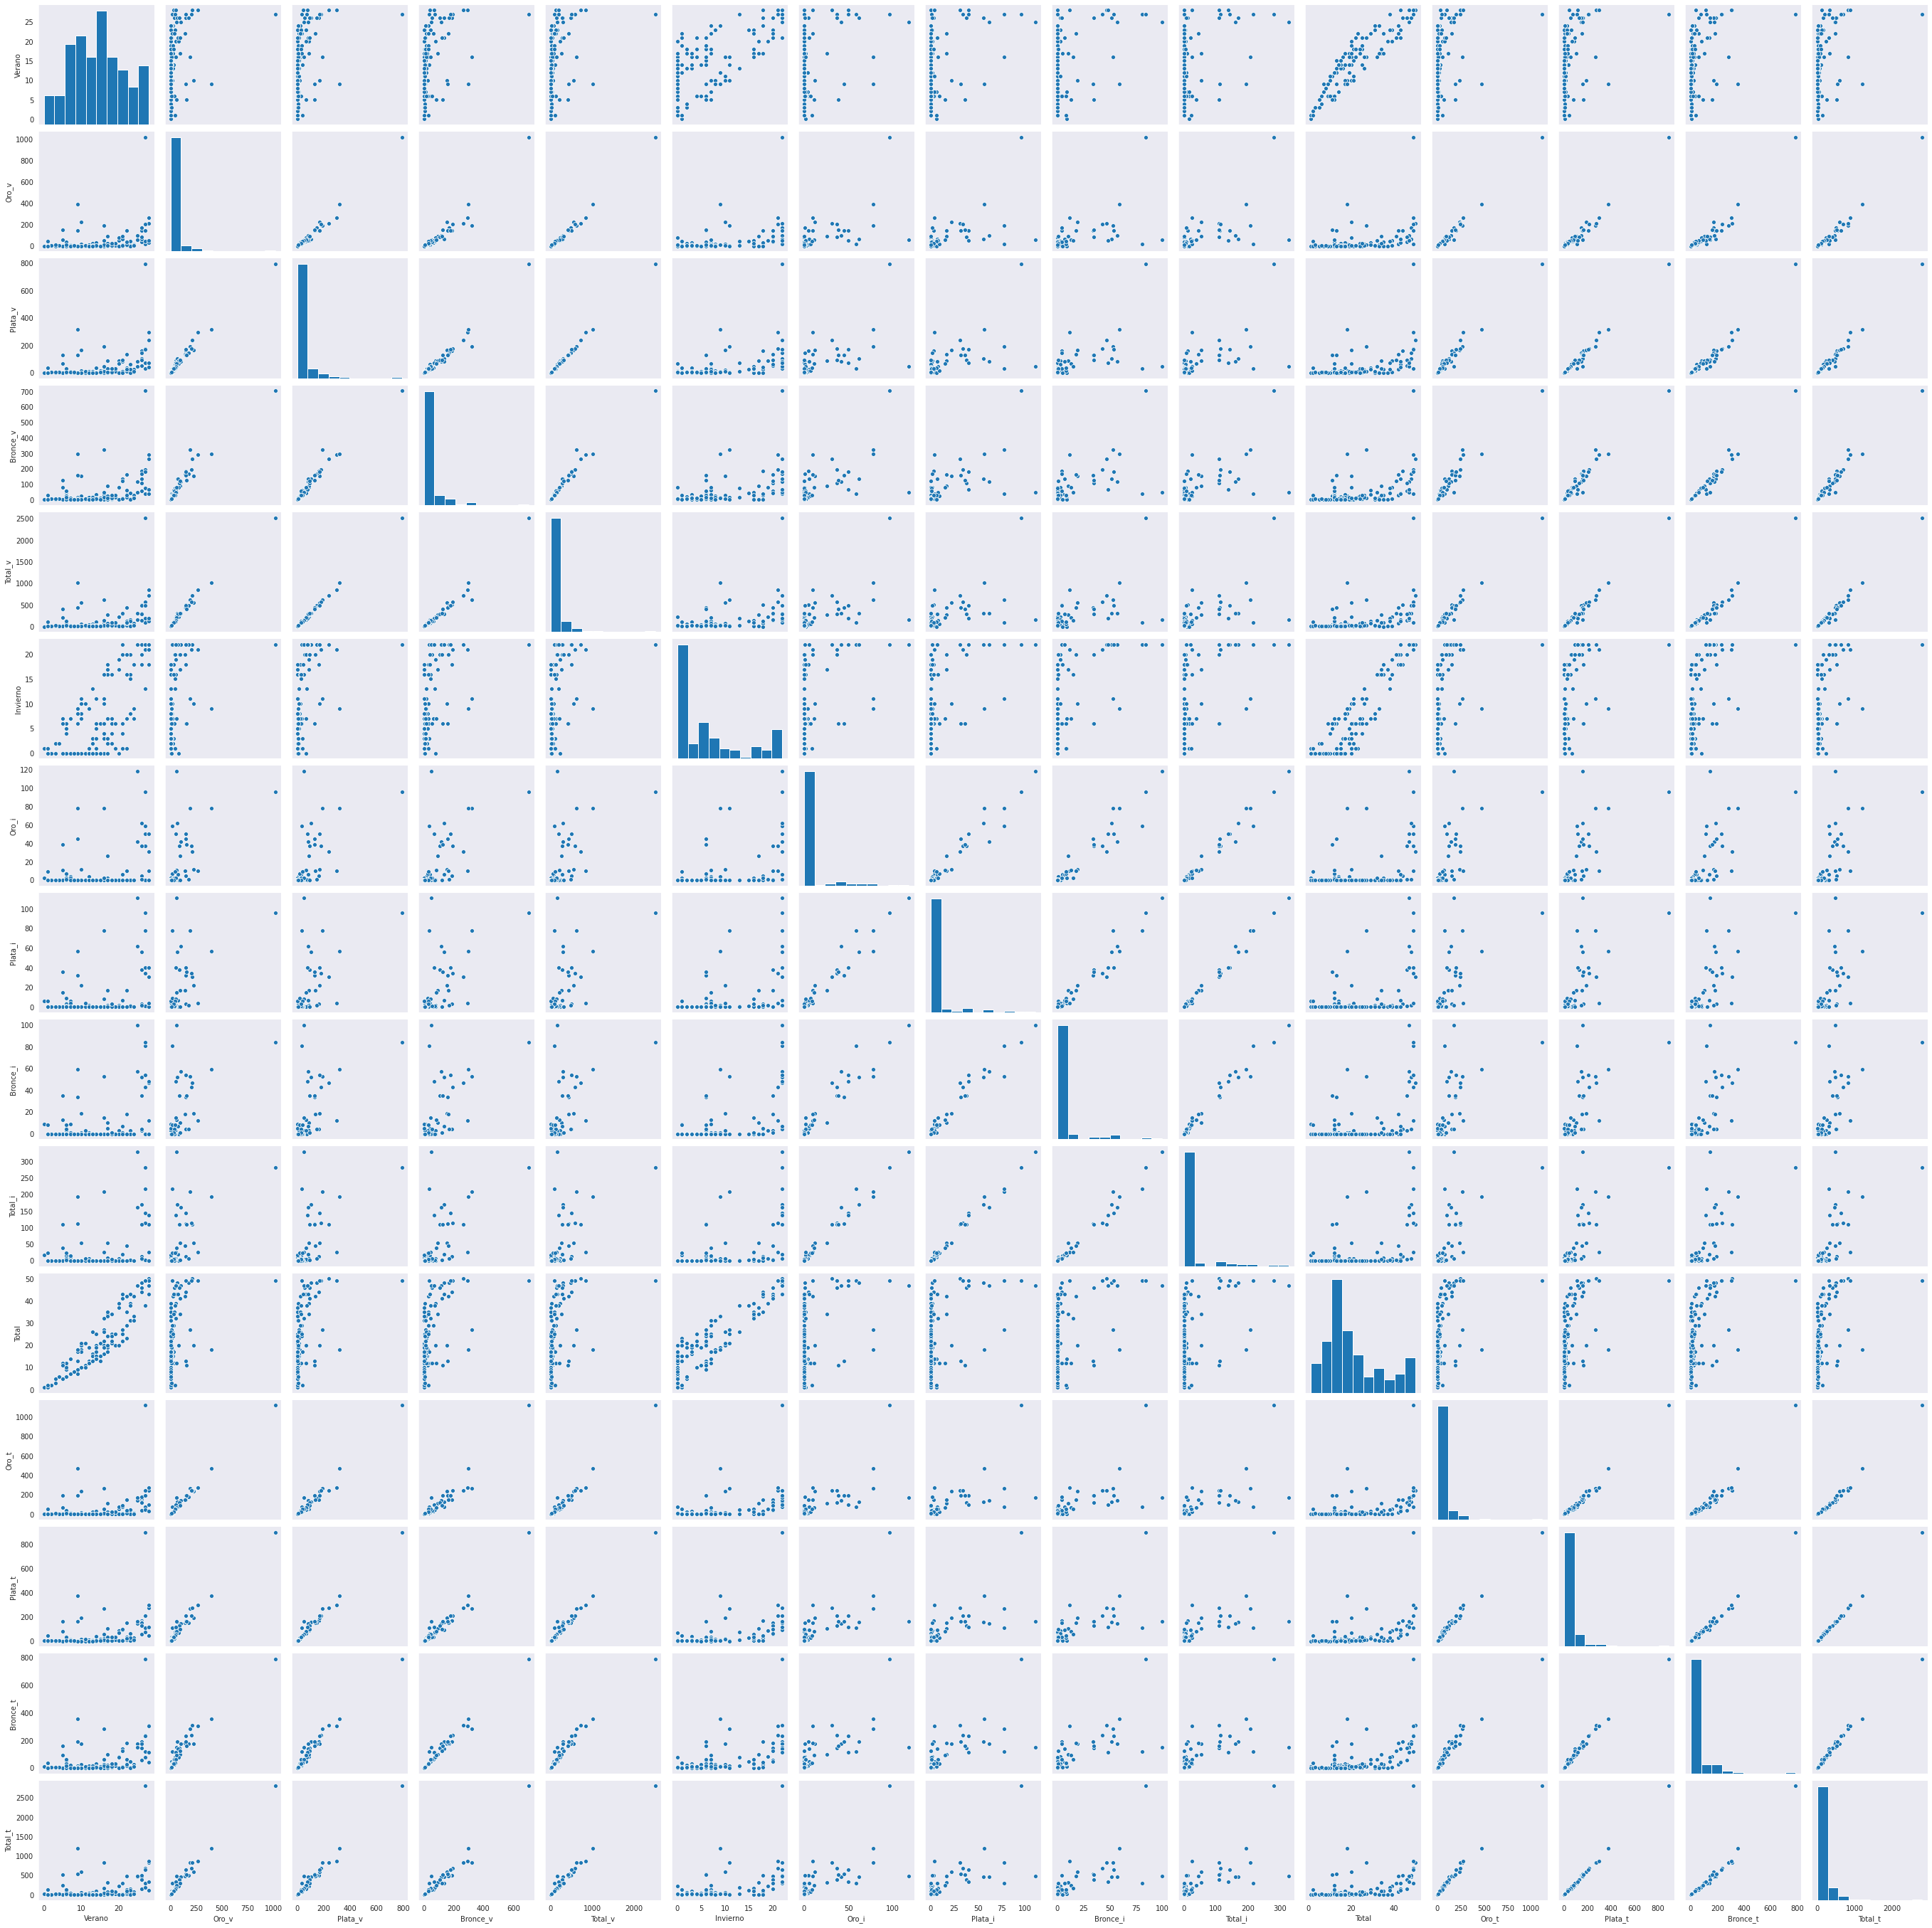

In [128]:
sns.pairplot(tabla)
plt.show()

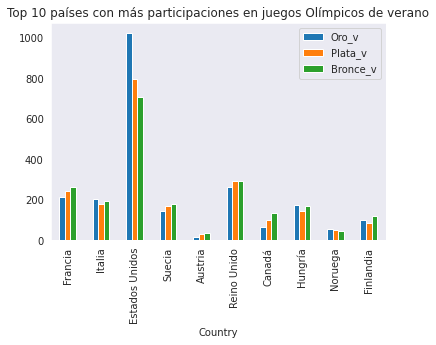

In [121]:
tabla.sort_values("Total", ascending=False).head(10).plot(y=["Oro_v", "Plata_v", "Bronce_v"],kind="bar")
plt.title("Top 10 países con más participaciones en juegos Olímpicos de verano")
plt.show()

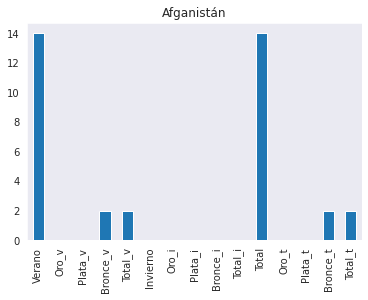

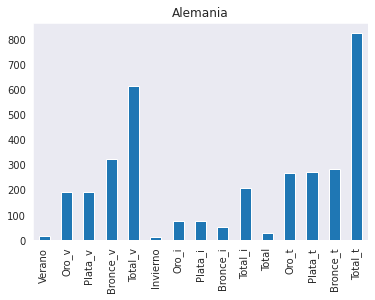

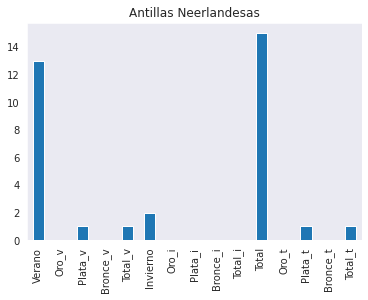

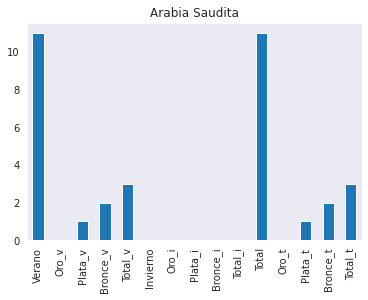

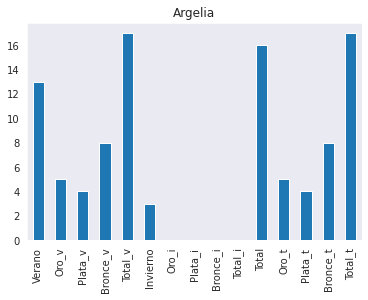

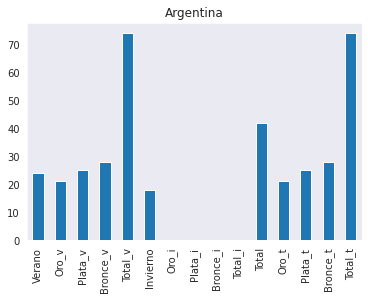

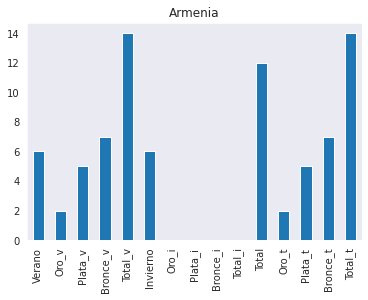

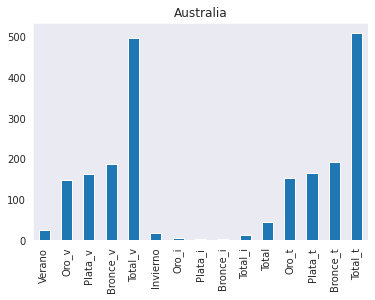

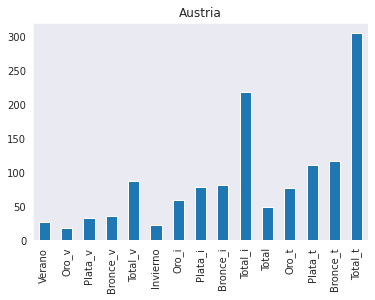

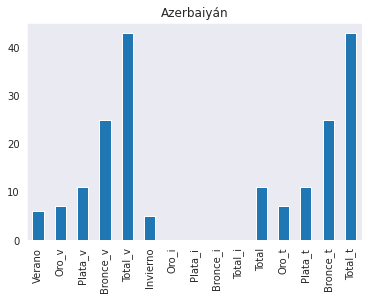

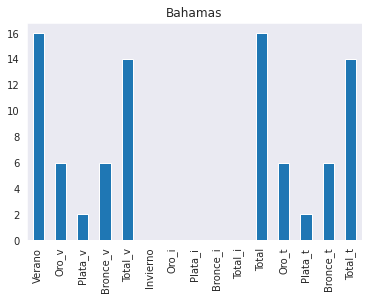

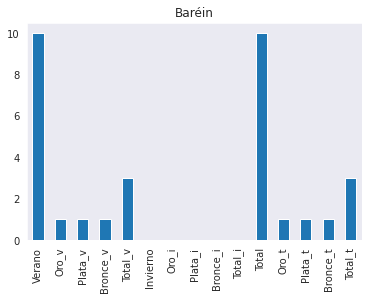

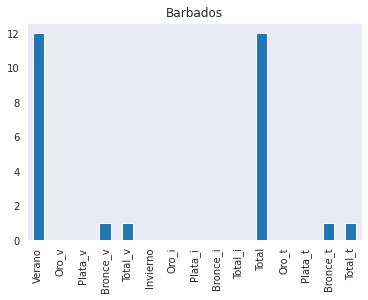

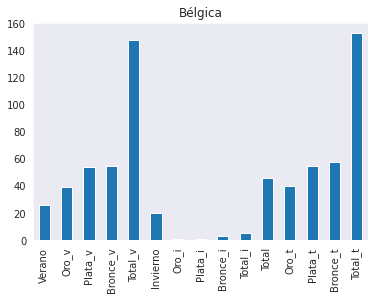

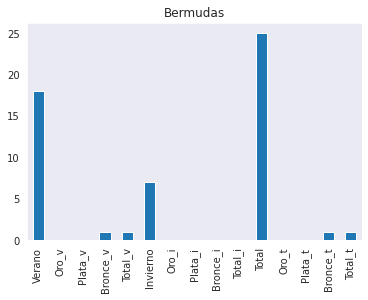

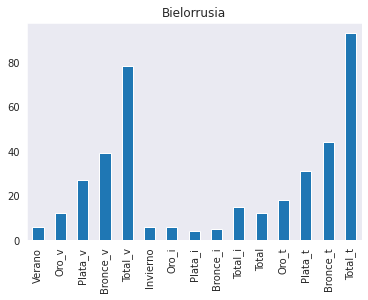

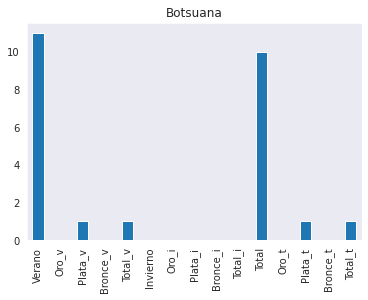

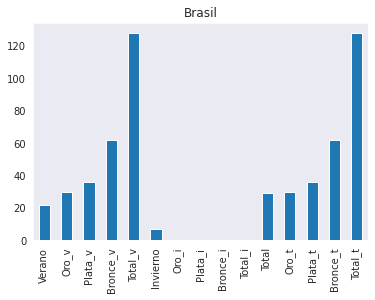

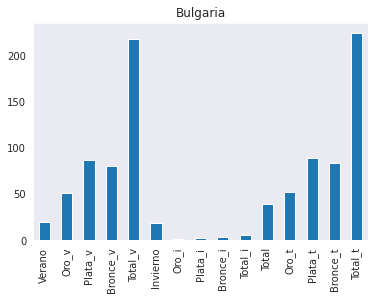

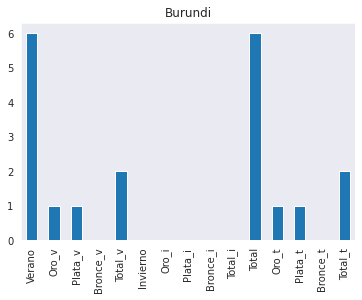

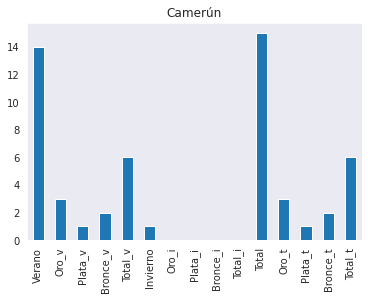

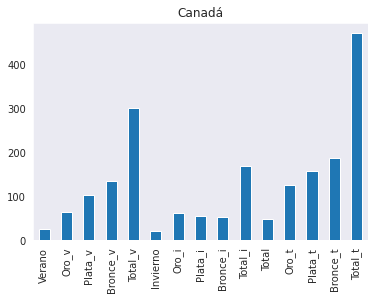

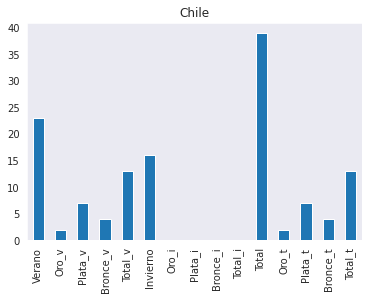

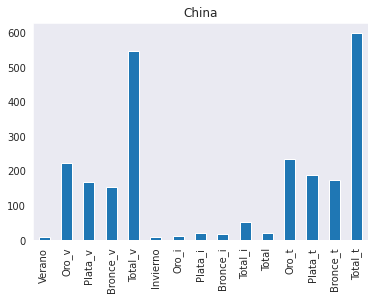

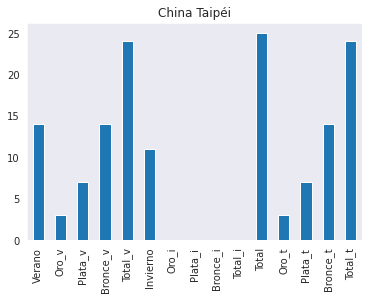

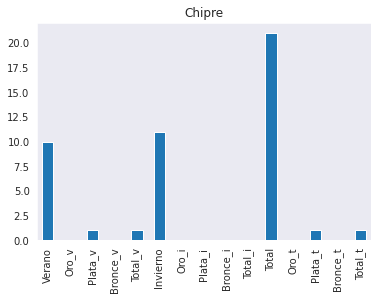

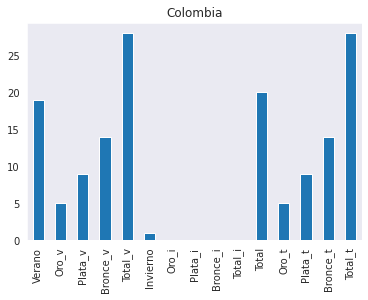

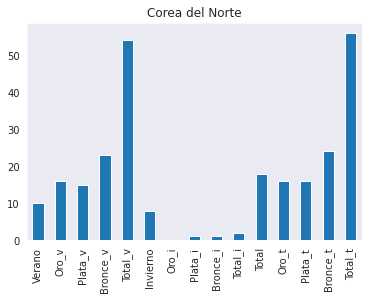

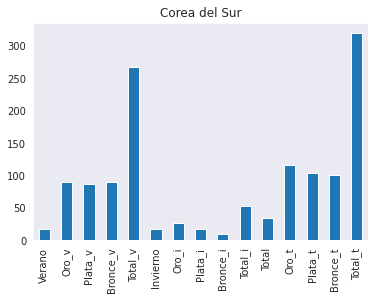

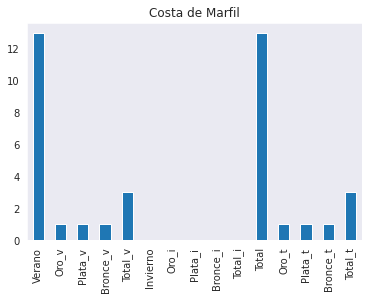

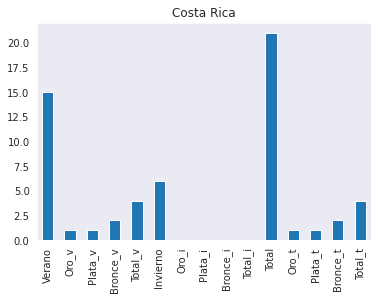

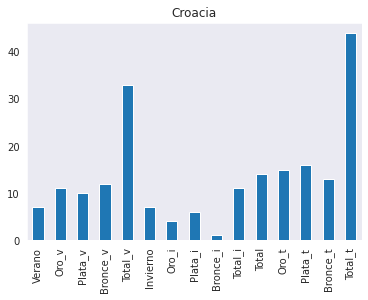

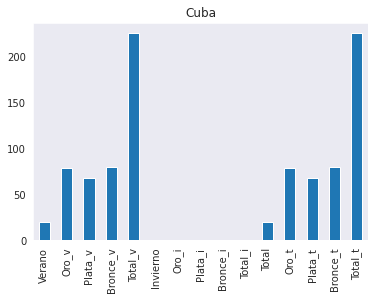

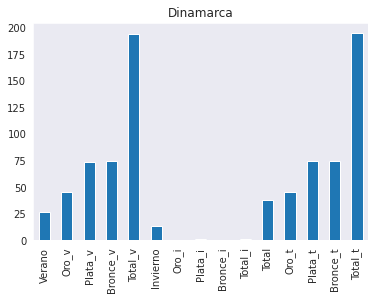

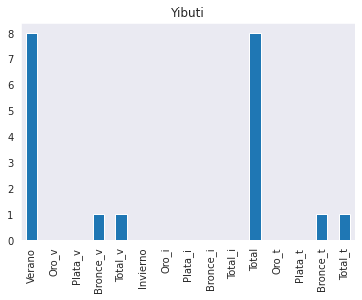

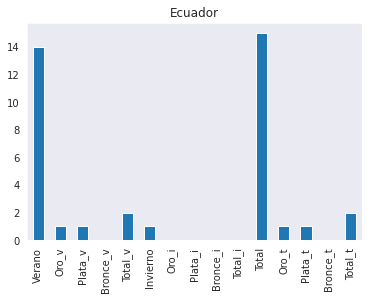

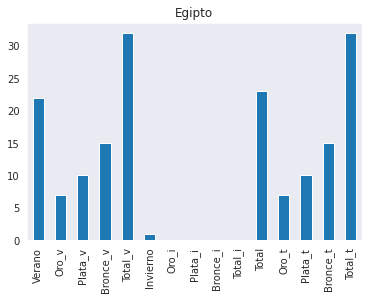

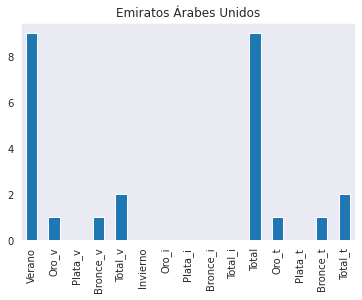

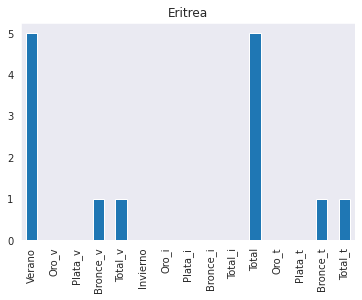

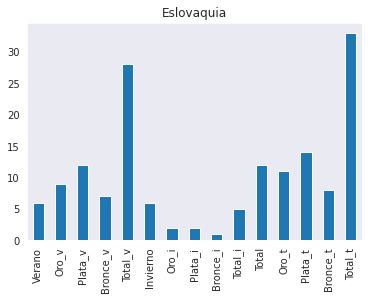

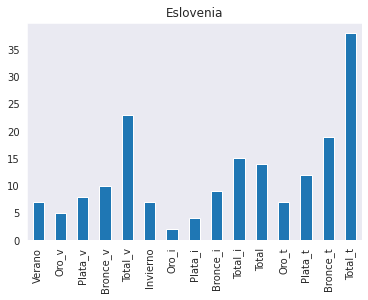

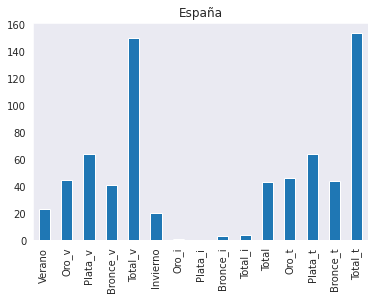

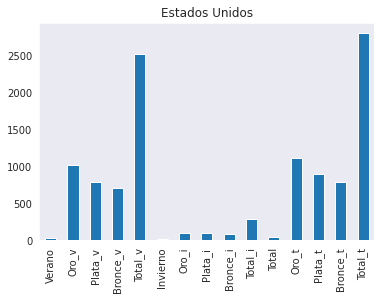

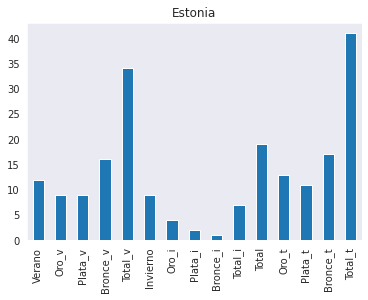

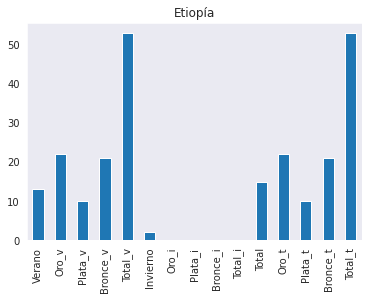

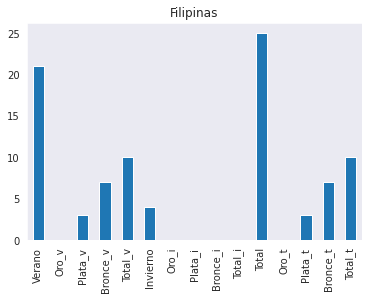

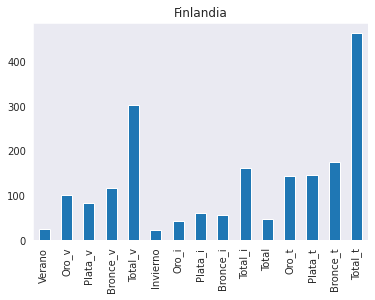

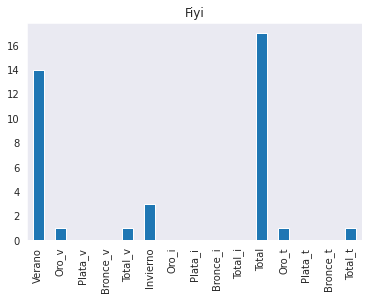

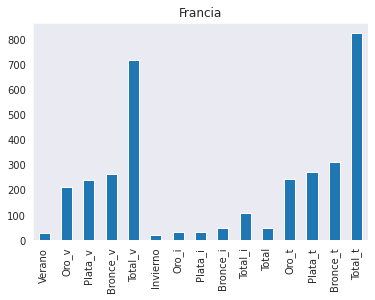

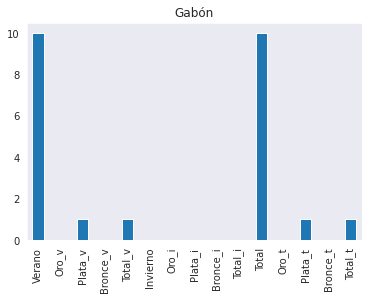

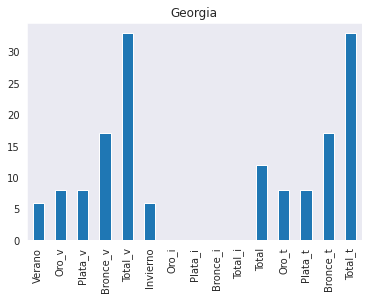

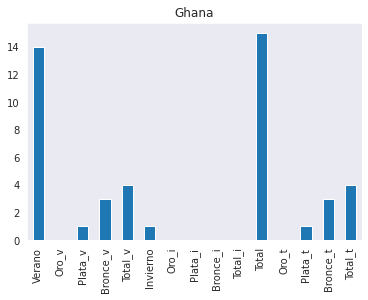

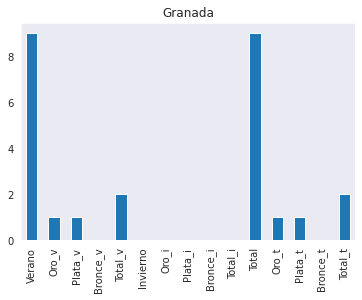

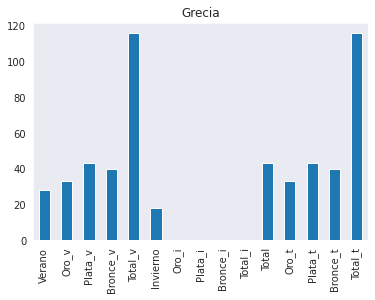

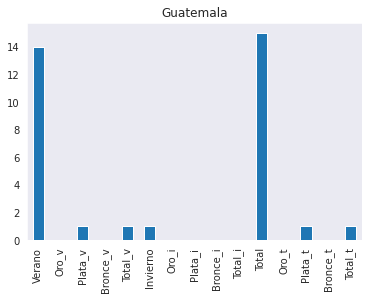

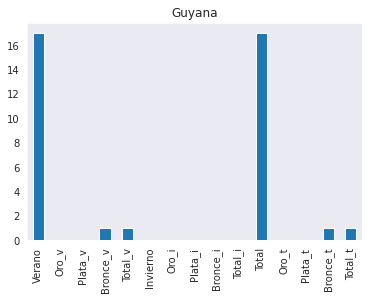

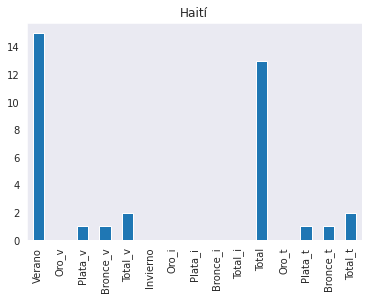

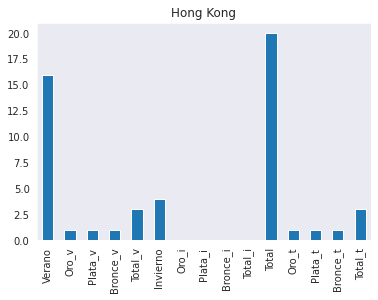

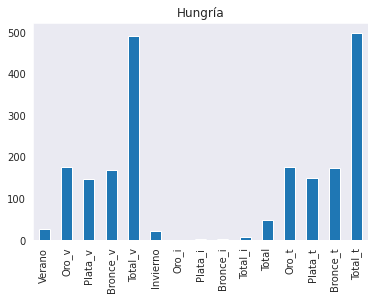

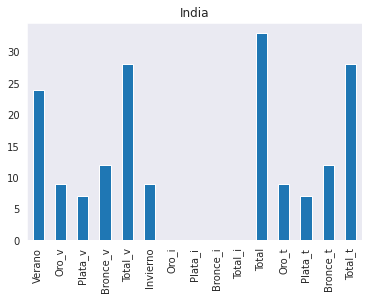

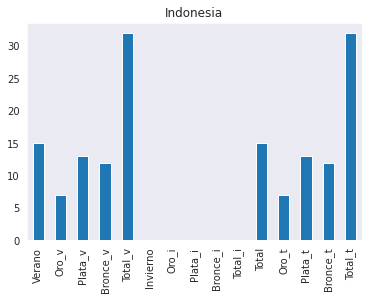

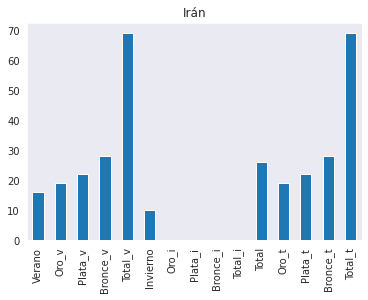

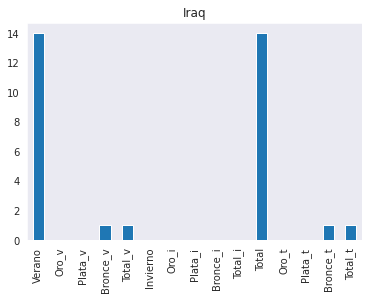

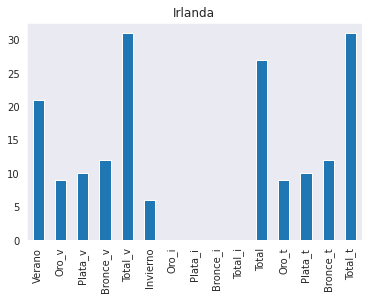

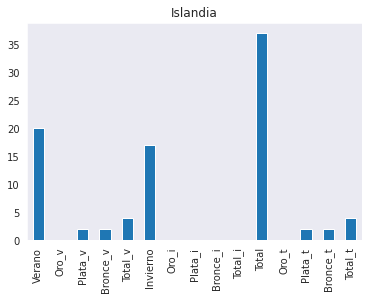

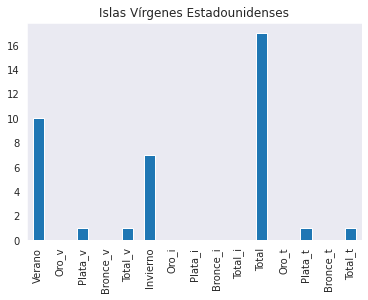

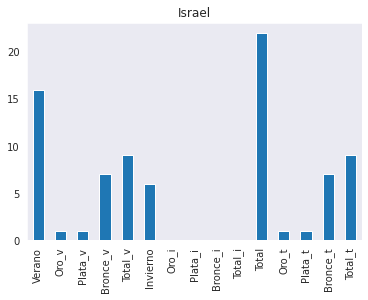

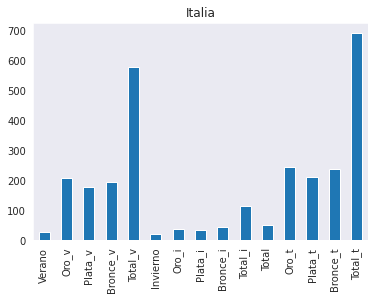

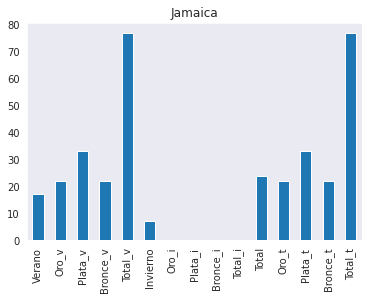

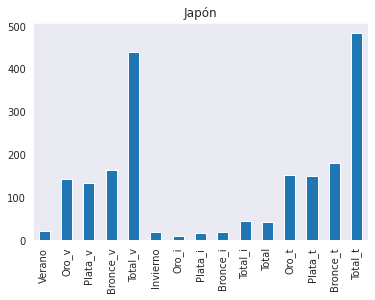

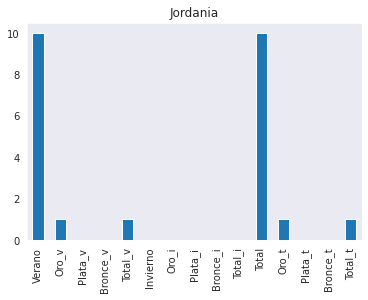

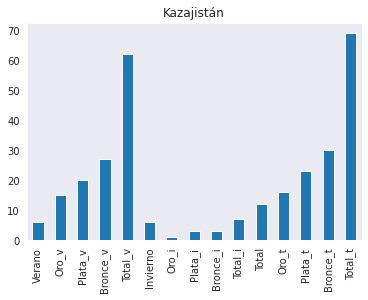

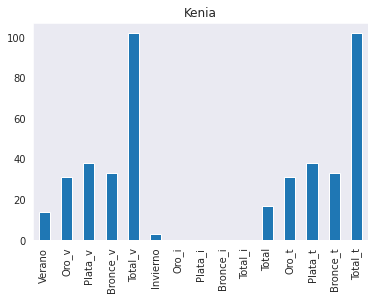

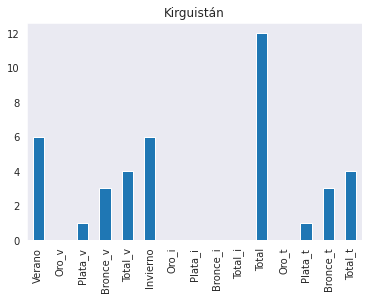

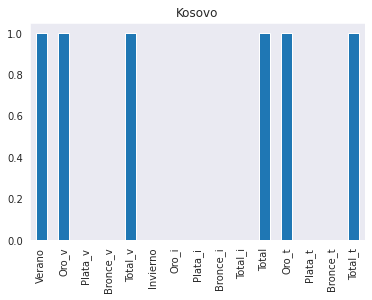

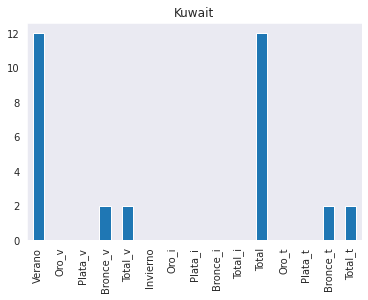

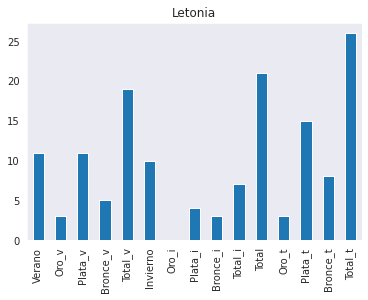

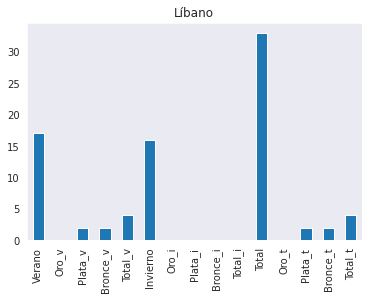

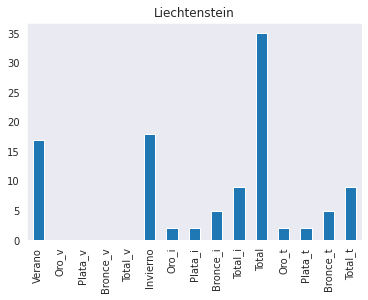

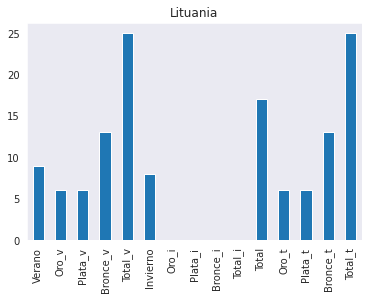

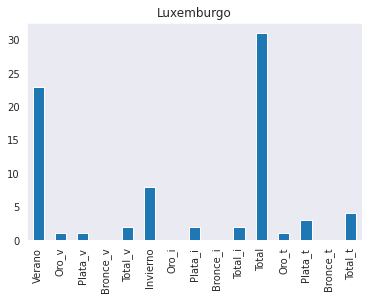

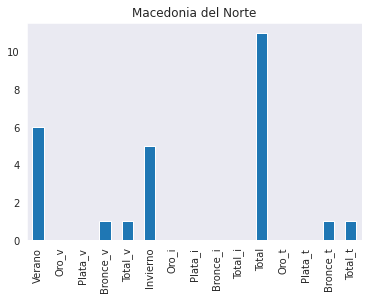

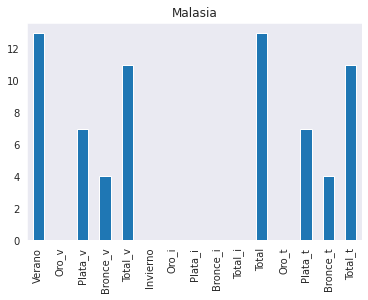

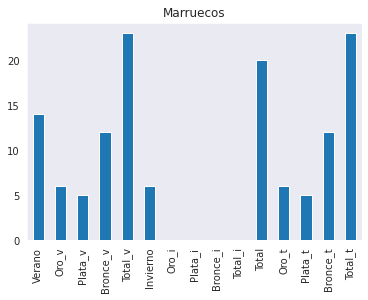

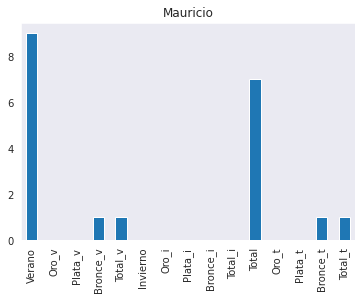

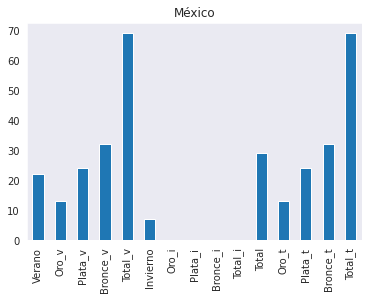

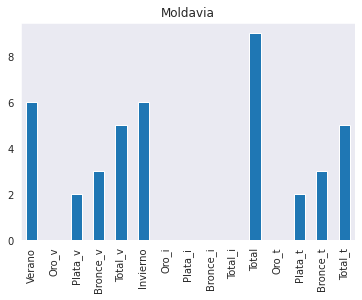

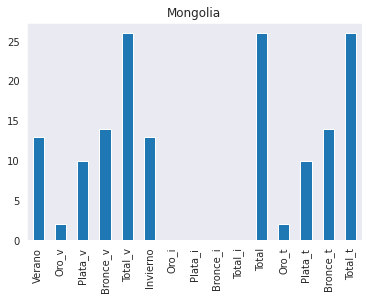

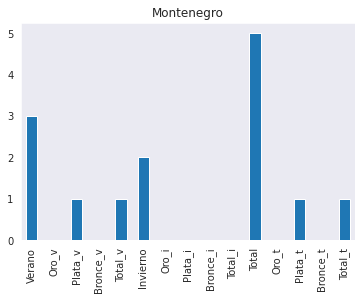

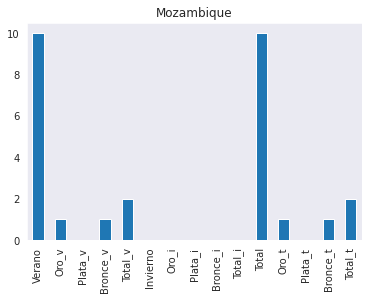

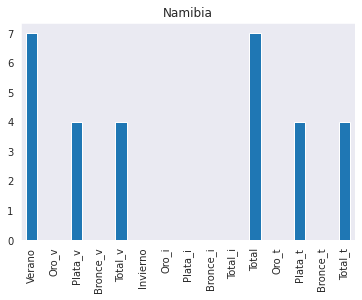

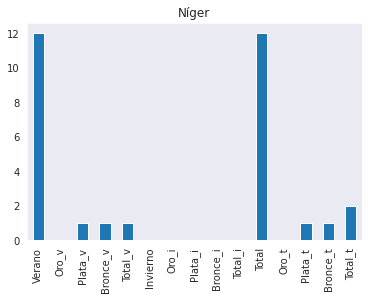

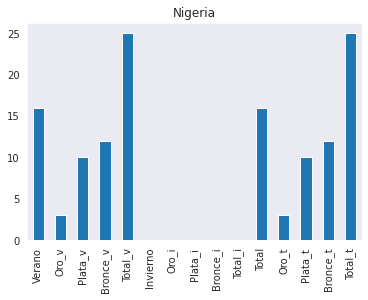

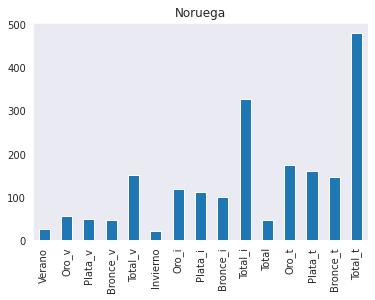

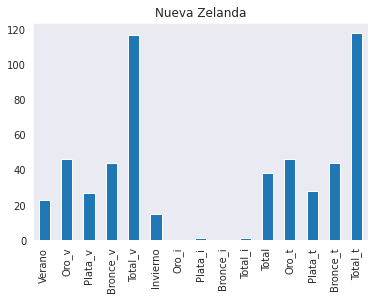

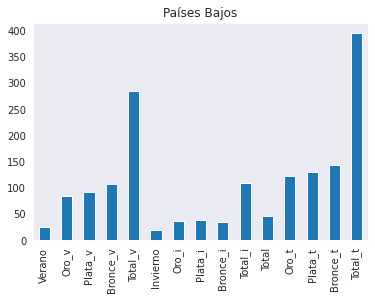

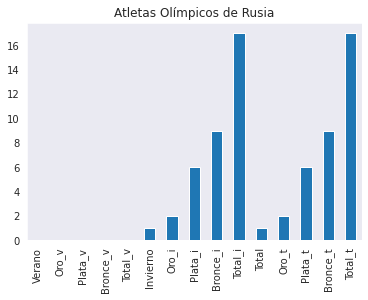

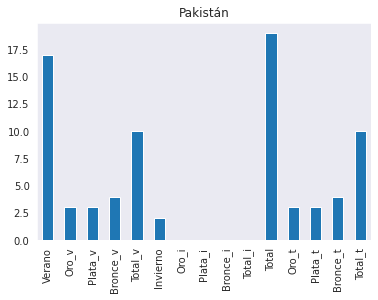

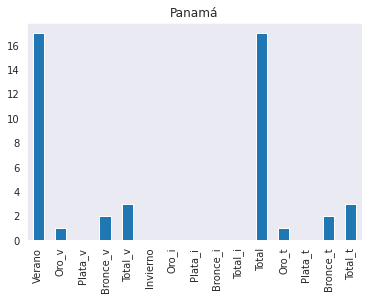

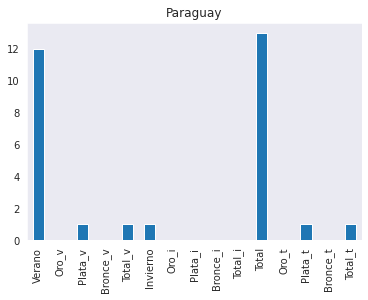

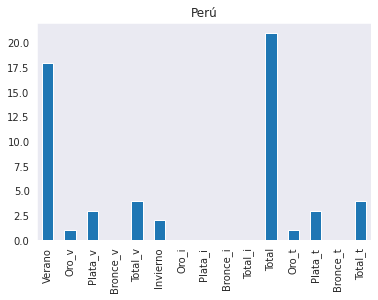

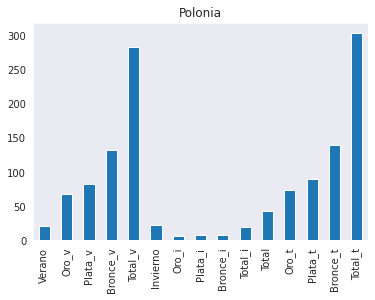

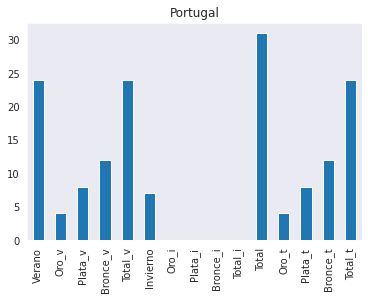

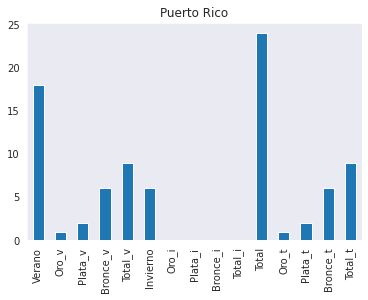

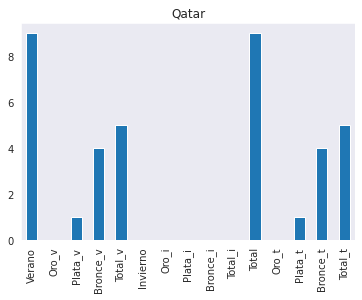

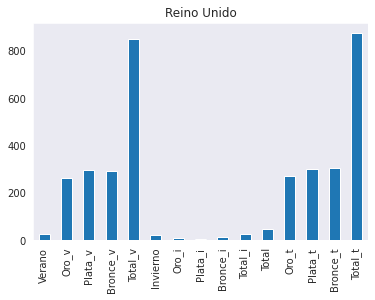

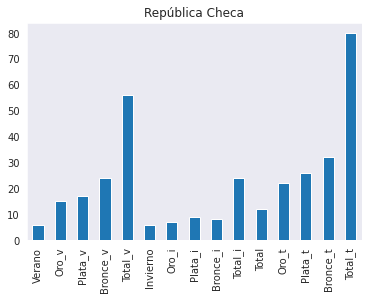

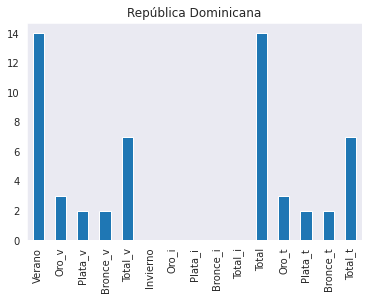

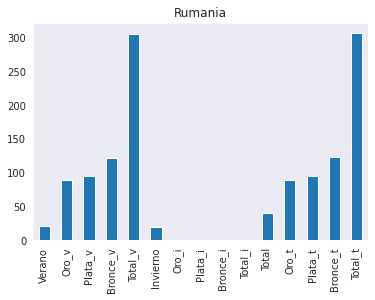

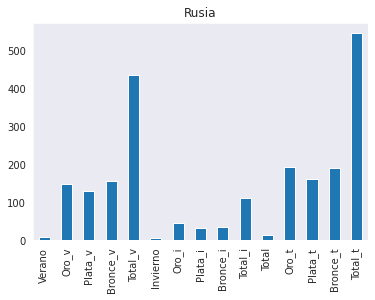

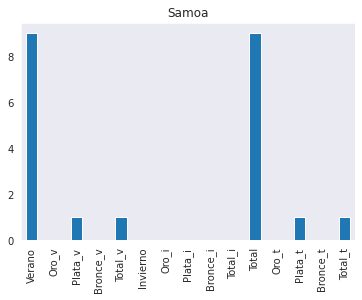

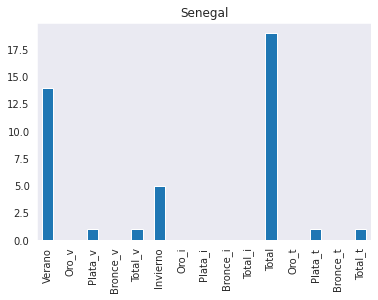

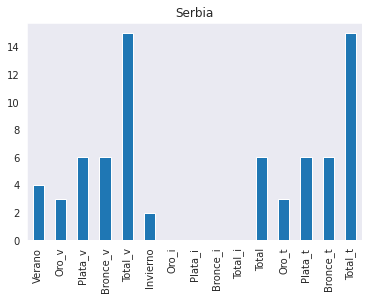

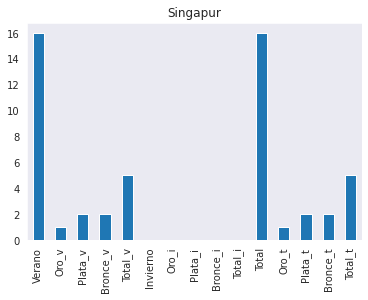

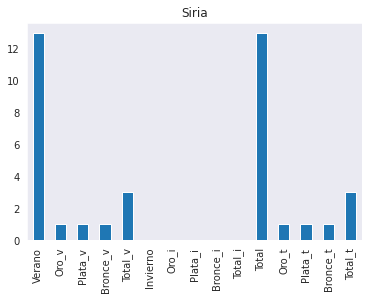

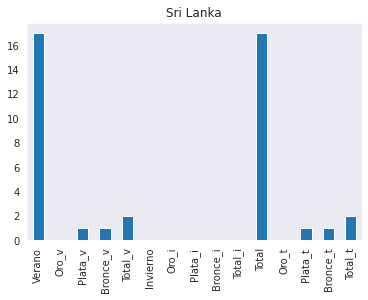

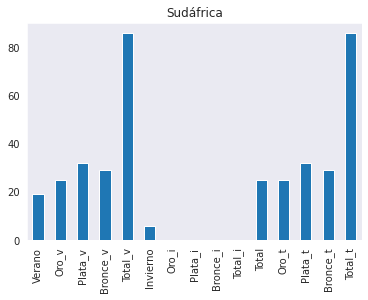

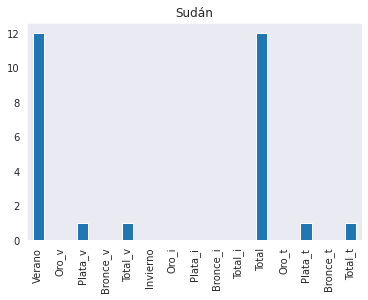

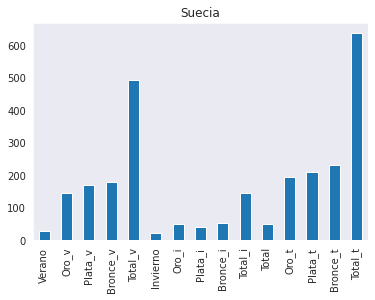

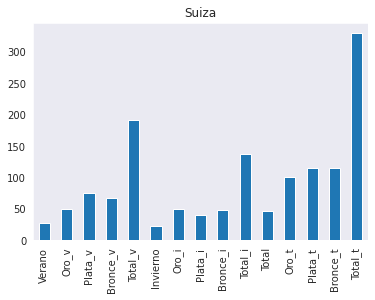

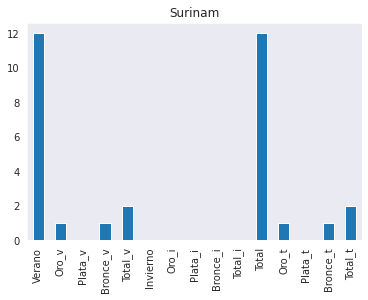

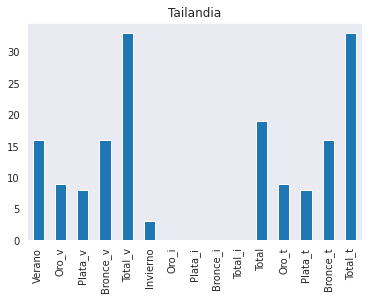

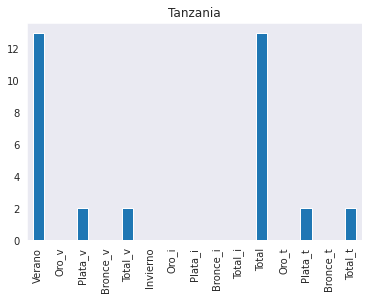

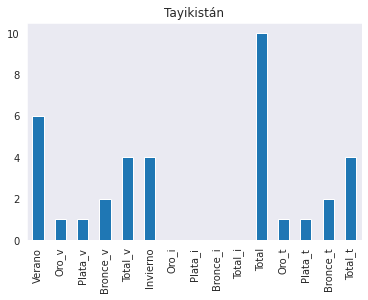

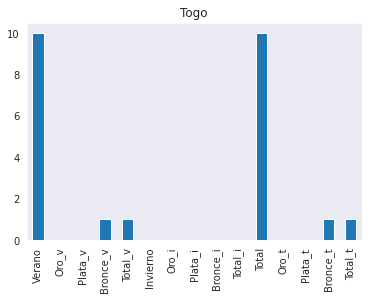

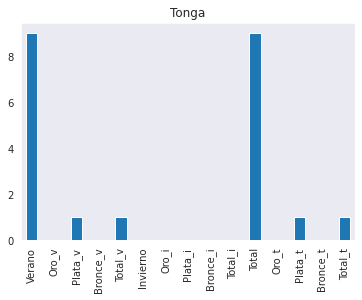

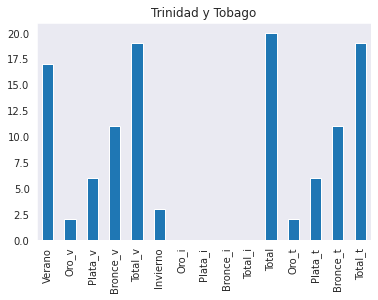

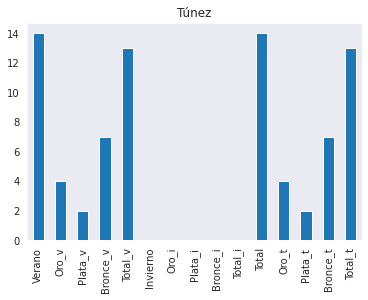

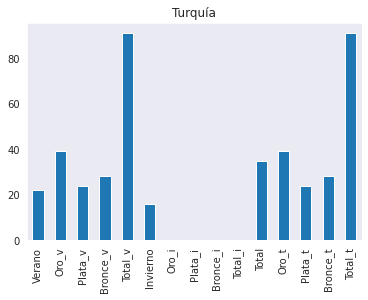

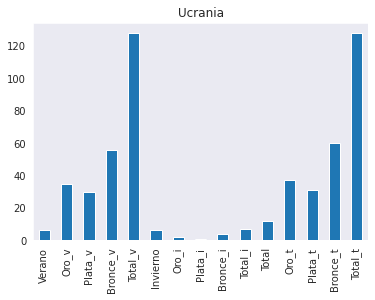

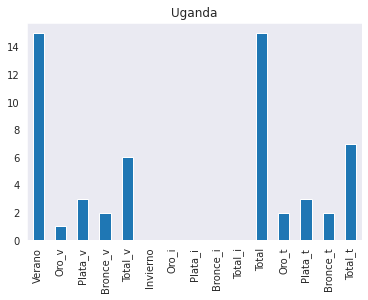

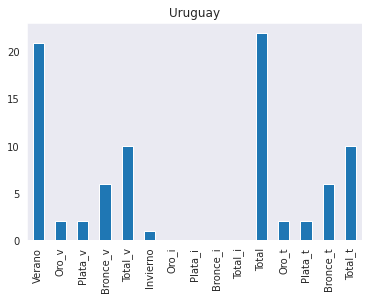

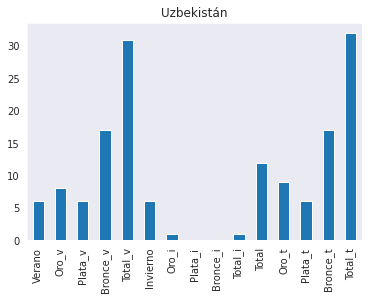

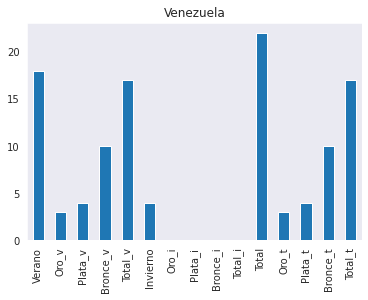

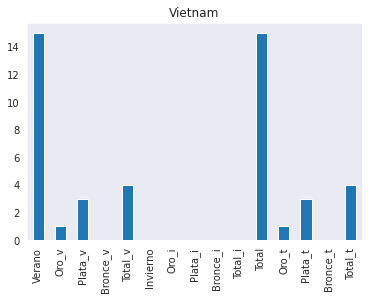

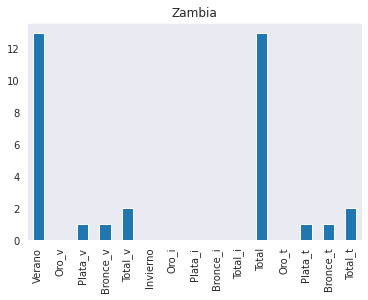

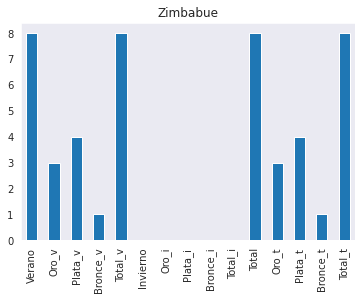

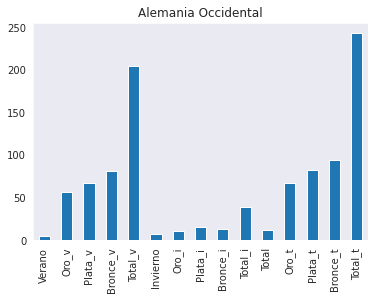

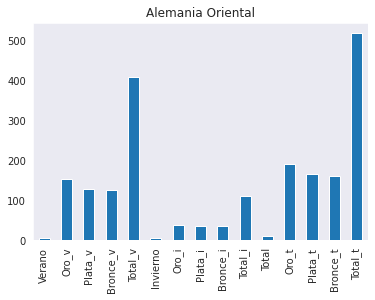

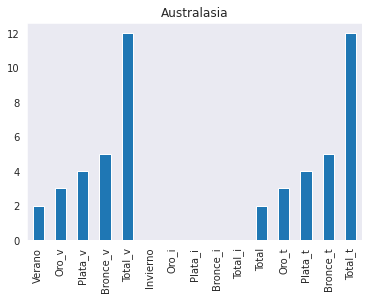

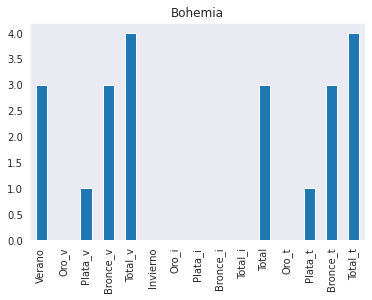

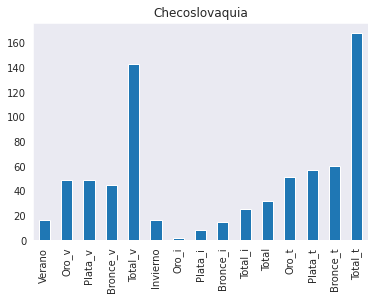

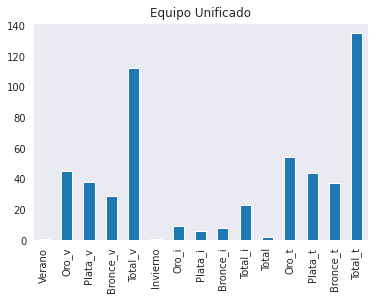

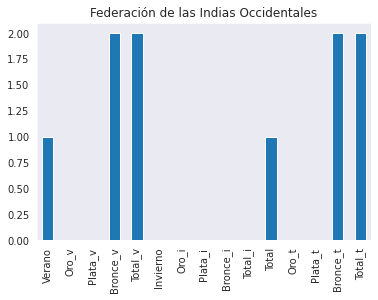

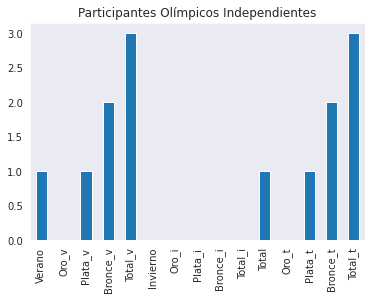

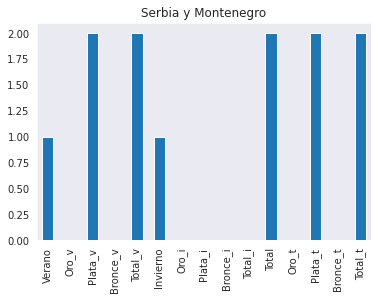

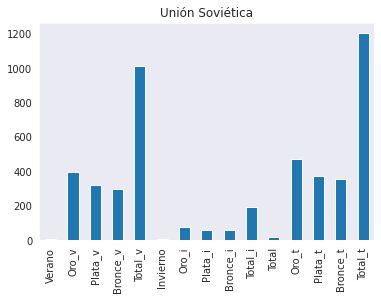

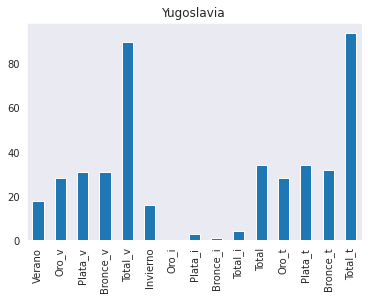

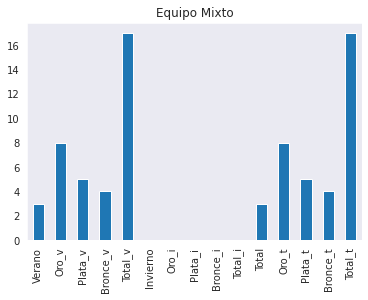

In [122]:
for i in range(len(tabla)):
    tabla.iloc[i].plot(kind="bar")
    plt.title(tabla.iloc[i].name)
    plt.show()

In [123]:
tabla.columns

Index(['Verano', 'Oro_v', 'Plata_v', 'Bronce_v', 'Total_v', 'Invierno',
       'Oro_i', 'Plata_i', 'Bronce_i', 'Total_i', 'Total', 'Oro_t', 'Plata_t',
       'Bronce_t', 'Total_t'],
      dtype='object')

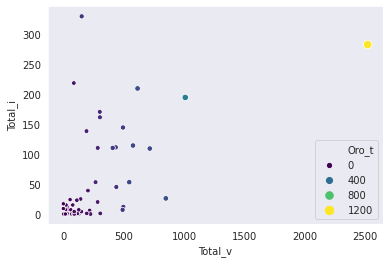

In [129]:
sns.scatterplot(x="Total_v",y="Total_i",data=tabla, size="Oro_t", hue="Oro_t", palette="viridis")
plt.show()